# Customer Segmentation Analysis: Insights from Income, Spending Behavior, and Demographics

       Customer_ID        Age  Annual_Income  Spending_Score
count     50.00000  50.000000      50.000000       50.000000
mean      25.50000  40.140000   73509.800000       47.660000
std       14.57738  13.278815   28981.802963       31.879627
min        1.00000  19.000000   21016.000000        1.000000
25%       13.25000  29.500000   53434.500000       17.000000
50%       25.50000  39.500000   74293.000000       43.000000
75%       37.75000  52.250000   98512.000000       77.750000
max       50.00000  64.000000  119299.000000       99.000000


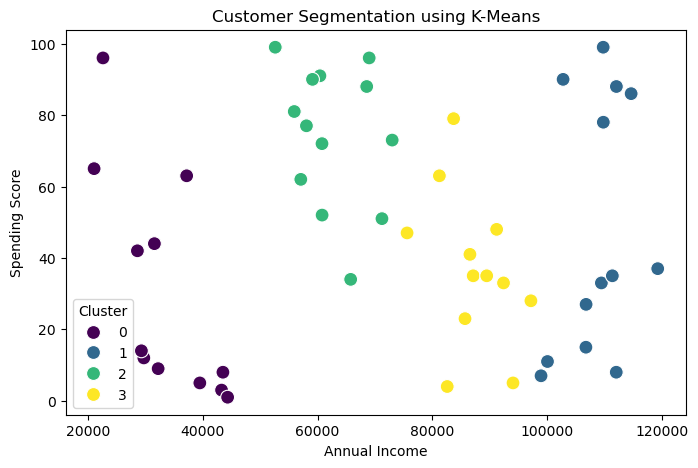

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = r"D:\OneDrive\Desktop\IFIM\4TH SEM\DWDM\CUSTOMER SEGMENTATION PROJECT\Customer Segmentation.xlsx" 
df = pd.read_excel(r"D:\OneDrive\Desktop\IFIM\4TH SEM\DWDM\CUSTOMER SEGMENTATION PROJECT\Customer Segmentation.xlsx")

X = df[['Annual_Income', 'Spending_Score']]

print(df.describe())

# Applying K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['Cluster'], palette='viridis', s=100)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.title('Customer Segmentation using K-Means')
plt.show()


Importing necessary libraries, suppressing warnings, and reading the dataset into a Pandas DataFrame. The script selects two key features, Annual Income and Spending Score, as input variables for clustering. Using the K-Means algorithm with four clusters (n_clusters=4) and a fixed random state (42) for reproducibility, the model is trained, and each customer is assigned to one of the four clusters. The resulting cluster labels are stored in a new column, 'Cluster', within the dataset. This segmentation helps in identifying distinct customer groups based on their income and spending behavior, which can be useful for targeted marketing strategies.

The scatter plot illustrates the results of customer segmentation using K-Means clustering, where customers are grouped based on Annual Income and Spending Score. Each color represents a different cluster, indicating distinct customer segments. The purple cluster (Cluster 0) consists of customers with low income and varied spending behavior, likely price-sensitive shoppers. The blue cluster (Cluster 1) represents high-income individuals with both high and low spending patterns, potentially premium or budget-conscious customers. The green cluster (Cluster 2) includes moderate-income customers with high spending scores, likely enthusiastic or impulsive buyers. Lastly, the yellow cluster (Cluster 3) comprises moderate to high-income customers with average spending scores, representing balanced shoppers. This segmentation helps businesses tailor their marketing strategies to target specific customer behaviors effectively.

In [10]:
df.head()

,Customer_ID,Age,Annual_Income,Spending_Score,Cluster
0,1,56,43483,8,0
1,2,46,68555,88,2
2,3,32,37159,63,0
3,4,60,100077,11,1
4,5,25,55920,81,2


In [11]:
print(df.describe())

       Customer_ID        Age  Annual_Income  Spending_Score    Cluster
count     50.00000  50.000000      50.000000       50.000000  50.000000
mean      25.50000  40.140000   73509.800000       47.660000   1.500000
std       14.57738  13.278815   28981.802963       31.879627   1.111168
min        1.00000  19.000000   21016.000000        1.000000   0.000000
25%       13.25000  29.500000   53434.500000       17.000000   1.000000
50%       25.50000  39.500000   74293.000000       43.000000   1.500000
75%       37.75000  52.250000   98512.000000       77.750000   2.000000
max       50.00000  64.000000  119299.000000       99.000000   3.000000


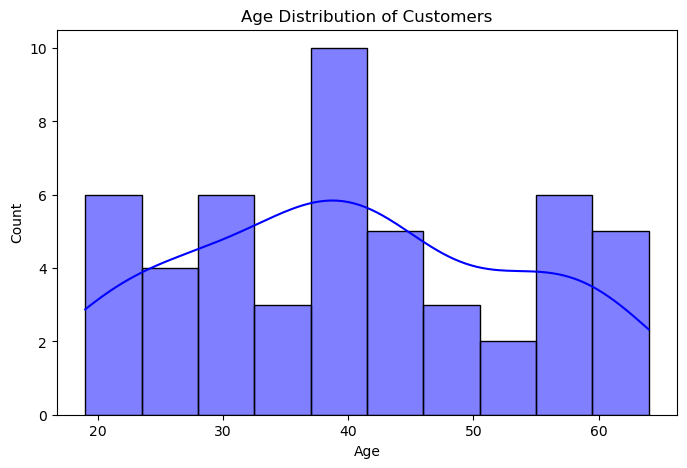

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=10, kde=True, color='blue')
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Customers")
plt.show()

The histogram represents the age distribution of customers, showing how different age groups are spread across the dataset. The x-axis denotes customer age, while the y-axis represents the count of customers in each age group. The plot indicates a relatively diverse distribution, with peaks around ages 40 and 60, suggesting that these age groups have a higher representation. The smoothed density curve (blue line) highlights fluctuations in customer age distribution, with noticeable variations in different age brackets. The presence of multiple peaks suggests that the dataset includes customers from various age segments rather than being concentrated in a single age group. This insight can help businesses tailor marketing strategies to target different customer demographics effectively.

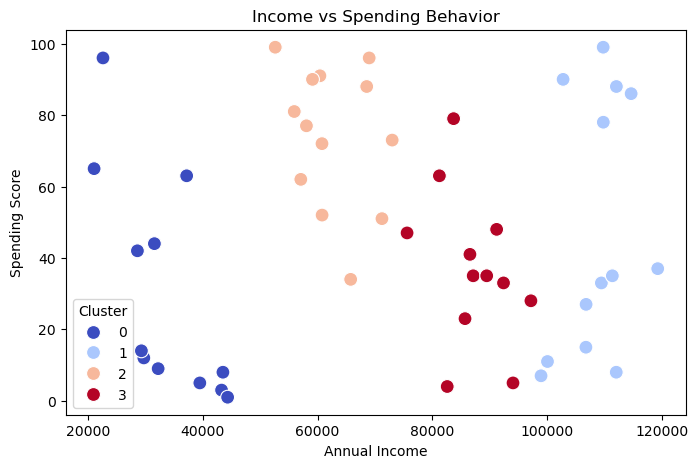

In [13]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Annual_Income'], y=df['Spending_Score'], hue=df['Cluster'], palette='coolwarm', s=100)
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Income vs Spending Behavior")
plt.show()

The scatter plot visualizes customer segmentation based on income and spending behavior, with four clusters represented by different colors. The blue cluster (Cluster 0) includes customers with low income and varying spending scores, likely budget-conscious or inconsistent spenders. The light blue cluster (Cluster 1) consists of high-income customers with both high and low spending behaviors, possibly indicating premium and frugal shoppers. The peach cluster (Cluster 2) represents moderate-income customers with high spending scores, suggesting frequent or impulse buyers. The red cluster (Cluster 3) consists of moderate to high-income individuals with controlled spending, likely budget-conscious but financially stable consumers. This segmentation provides valuable insights for businesses to create targeted marketing and customer engagement strategies.

In [14]:
grouped = df.groupby("Cluster")["Spending_Score"].mean().reset_index()
print(grouped.sort_values(by="Spending_Score", ascending=False))

   Cluster  Spending_Score
2        2       74.307692
1        1       47.230769
3        3       36.750000
0        0       30.166667


It displays the average spending score for each customer cluster, sorted in descending order. 
**Cluster 2 has the highest average spending score (74.31)**, indicating that these customers are **high spenders**, likely engaged in frequent or impulse buying. 
**Cluster 1 follows with a spending score of 47.23**, representing moderate spenders who balance their purchases. 
**Cluster 3 has an average spending score of 36.75**, showing a more cautious spending behavior. 
**Cluster 0 has the lowest spending score (30.17),** suggesting that these customers are **low spenders, possibly budget-conscious or financially conservative**. 
This analysis helps businesses identify their most valuable customers and design targeted marketing strategies to optimize engagement and revenue.

                Customer_ID       Age  Annual_Income  Spending_Score   Cluster
Customer_ID        1.000000 -0.167265      -0.132043        0.177174 -0.014489
Age               -0.167265  1.000000       0.323543        0.002429  0.204013
Annual_Income     -0.132043  0.323543       1.000000        0.010028  0.421824
Spending_Score     0.177174  0.002429       0.010028        1.000000  0.169667
Cluster           -0.014489  0.204013       0.421824        0.169667  1.000000


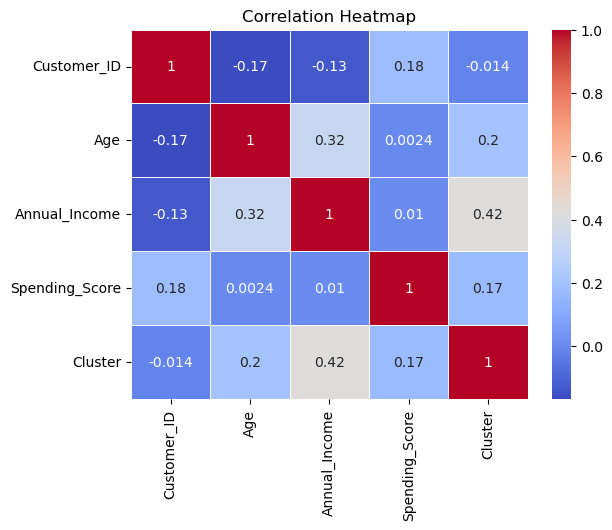

In [15]:
print(df.corr())
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

The correlation heatmap illustrates the relationships between different variables in the dataset.

1. Age and Annual Income have a moderate positive correlation (0.32), indicating that older individuals tend to have higher incomes.
2. Annual Income and Cluster show a noticeable positive correlation (0.42), suggesting that cluster segmentation is influenced by income levels.
3. Spending Score has a very weak correlation with both Age (0.0024) and Annual Income (0.01), implying that spending behavior is independent of these factors.
4. Spending Score and Cluster have a weak positive correlation (0.17), meaning that the clusters are not heavily determined by spending behavior alone.
5. Customer ID has no significant correlation with other variables, as expected since it is just an identifier.

Overall, the heatmap suggests that customer segmentation (Cluster) is more dependent on income than on age or spending behavior, and spending patterns do not strongly correlate with income levels.

## CONCLUSION

1. Customer Age Distribution: The histogram shows a diverse age distribution among customers, with notable peaks around ages 40 and 60. The data indicates a balanced spread across different age groups.

2. Income vs Spending Clusters: The scatter plot highlights four distinct customer clusters based on income and spending behavior. Some customers with high income have low spending scores, while others with moderate income exhibit high spending behavior.

3. Cluster-Wise Spending Scores: Cluster 2 has the highest average spending score (~74), indicating customers with high engagement. Cluster 0 has the lowest (~30), representing low-spending customers.

4. Correlation Insights: There is a moderate correlation between age and income (0.32) and a stronger correlation between income and cluster assignment (0.42), indicating that clustering is influenced more by income than by spending behavior. Spending score has a weak correlation with both age and income, showing that customer spending is independent of these factors.

The segmentation analysis suggests that customers are grouped based on income and spending behavior, but spending is not directly influenced by age or income. This insight can help businesses tailor marketing strategies for different customer segments, focusing on high-spending clusters while finding ways to engage lower-spending groups.